In [14]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats
import matplotlib.pyplot as plt

data_mat = pd.read_csv('./student-mat.csv',delimiter=';')
data_por = pd.read_csv('./student-por.csv',delimiter=';')

print(data_mat.shape)
print(data_por.shape)

(395, 33)
(649, 33)


In [21]:
data_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [23]:
data_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [3]:
# Simplificacion mostrada en el *.R
data = pd.concat([data_por,data_mat])
data = data.drop_duplicates(["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"])

In [60]:
print(data.shape)
data.info()
data.describe()

(662, 33)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 662 entries, 0 to 394
Data columns (total 33 columns):
school        662 non-null object
sex           662 non-null object
age           662 non-null int64
address       662 non-null object
famsize       662 non-null object
Pstatus       662 non-null object
Medu          662 non-null int64
Fedu          662 non-null int64
Mjob          662 non-null object
Fjob          662 non-null object
reason        662 non-null object
guardian      662 non-null object
traveltime    662 non-null int64
studytime     662 non-null int64
failures      662 non-null int64
schoolsup     662 non-null object
famsup        662 non-null object
paid          662 non-null object
activities    662 non-null object
nursery       662 non-null object
higher        662 non-null object
internet      662 non-null object
romantic      662 non-null object
famrel        662 non-null int64
freetime      662 non-null int64
goout         662 non-null int64
Dalc      

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000
mean,16.812689,2.492447,2.293051,1.566465,1.929003,0.259819,3.941088,3.187311,3.173716,1.506042,2.287009,3.533233,3.891239,11.404834,11.530211,11.842900
std,1.269194,1.130958,1.094027,0.744699,0.826621,0.628750,0.935679,1.057195,1.161031,0.926559,1.290878,1.435854,5.140708,2.758429,2.940380,3.298939
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,40.000000,19.000000,19.000000,19.000000


In [10]:
grades=["G1","G2","G3"]
norm=[]
for i in grades:
    norm.append(stats.normaltest(data[i]))
for i in range(0,len(grades)):
    print(grades[i])
    print(norm[i])
    print('----------')

G1
NormaltestResult(statistic=0.11777004555189473, pvalue=0.94281516519593145)
----------
G2
NormaltestResult(statistic=48.906050603082704, pvalue=2.3998607657331425e-11)
----------
G3
NormaltestResult(statistic=128.59398430688466, pvalue=1.1917114299788066e-28)
----------


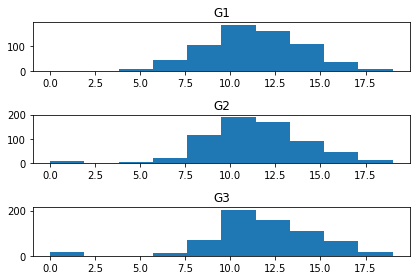

In [15]:
i = 1
for w in grades:
    plt.subplot(3, 1, i)
    plt.tight_layout()
    i += 1
    plt.hist(data[w])
    plt.title(w)

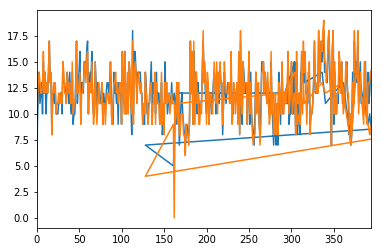

In [21]:
data["G1"].plot()
data["G2"].plot()

In [24]:
corr = data.corr()

In [77]:
os['Walc']

G3          0.186917
G2          0.174871
G1          0.172461
health      0.122992
absences    0.105249
dtype: float64

In [76]:
correlated_data = data.corr().abs()

os = (correlated_data.where(np.triu(np.ones(correlated_data.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
os['Dalc']


Walc        0.615797
G3          0.208553
G1          0.202212
G2          0.194142
absences    0.129726
health      0.066372
dtype: float64

In [42]:
s = correlated_data.unstack()
so = s.sort_values(kind="quicksort",ascending=False)

print(so)

G3          G3            1.000000
G2          G2            1.000000
Medu        Medu          1.000000
Fedu        Fedu          1.000000
traveltime  traveltime    1.000000
studytime   studytime     1.000000
failures    failures      1.000000
famrel      famrel        1.000000
freetime    freetime      1.000000
goout       goout         1.000000
Dalc        Dalc          1.000000
Walc        Walc          1.000000
health      health        1.000000
absences    absences      1.000000
G1          G1            1.000000
age         age           1.000000
G2          G3            0.915835
G3          G2            0.915835
G2          G1            0.859295
G1          G2            0.859295
            G3            0.817636
G3          G1            0.817636
Fedu        Medu          0.635156
Medu        Fedu          0.635156
Dalc        Walc          0.615797
Walc        Dalc          0.615797
G3          failures      0.404783
failures    G3            0.404783
Walc        goout   

In [74]:
dummy_data = pd.get_dummies(data)
dummy_data
dummy_corr = dummy_data.corr().abs()
s_d = dummy_corr.unstack()
so_d = s_d.sort_values(kind="quicksort",ascending=False)
so_d[85:120]

G3                 G2                   0.915835
G2                 G3                   0.915835
                   G1                   0.859295
G1                 G2                   0.859295
                   G3                   0.817636
G3                 G1                   0.817636
guardian_father    guardian_mother      0.803735
guardian_mother    guardian_father      0.803735
Fjob_services      Fjob_other           0.704856
Fjob_other         Fjob_services        0.704856
Medu               Fedu                 0.635156
Fedu               Medu                 0.635156
Dalc               Walc                 0.615797
Walc               Dalc                 0.615797
reason_course      reason_home          0.477022
reason_home        reason_course        0.477022
reason_course      reason_reputation    0.472928
reason_reputation  reason_course        0.472928
guardian_mother    guardian_other       0.451893
guardian_other     guardian_mother      0.451893
Mjob_teacher       M